In [31]:
pip install imbalanced-learn

In [32]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE # deal with imbalance data
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv('diabetes_dataset.csv')
df

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

#MISSING VALUE

In [36]:
df.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [37]:
indexes = df[df['Diabetic'].isna() | df['Pdiabetes'].isna() | df['BMI'].isna()].index.to_list()
df.drop(index= indexes,inplace = True)
df['Pregancies'].fillna(value = 0.0, inplace= True)

df.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

#DISTRIBUSI KELAS

In [38]:
print(df['Diabetic'].value_counts())

no     682
yes    265
Name: Diabetic, dtype: int64


C:\Users\Nurussakinah\AppData\Local\Temp\ipykernel_21076\2419854377.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Diabetic', palette=death_color)


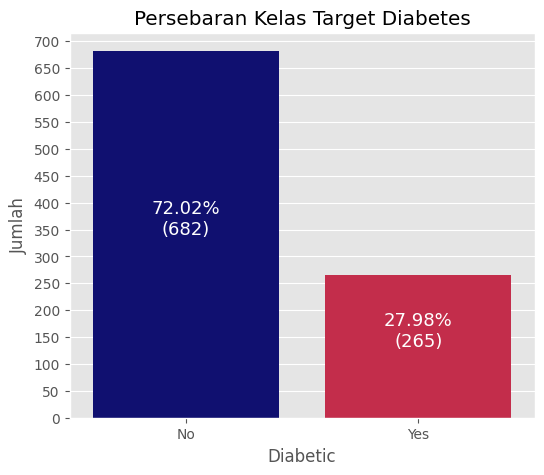

In [39]:
target_count = df.Diabetic.value_counts()
death_color = ['navy', 'crimson']
with plt.style.context('ggplot'):
    plt.figure(figsize=(6, 5))
    sns.countplot(data=df, x='Diabetic', palette=death_color)
    for name , val in zip(target_count.index, target_count.values):
        plt.text(name, val/2, f'{round(val/sum(target_count)*100, 2)}%\n({val})', ha='center',
                color='white', fontdict={'fontsize':13})
    plt.xticks(ticks=target_count.index, labels=['No', 'Yes'])
    plt.yticks(np.arange(0, max(target_count.values)+50, 50))
    plt.title('Persebaran Kelas Target Diabetes')
    plt.xlabel('Diabetic')
    plt.ylabel('Jumlah')
    plt.savefig('persebaran_kelas_diabetes.png', bbox_inches='tight')

    plt.show()

In [40]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

In [41]:
for col in df_obj.columns:
    print(col)
    print(df[col].value_counts())
    print('======================================')

Age
less than 40    484
40-49           164
50-59           155
60 or older     144
Name: Age, dtype: int64
Gender
Male      578
Female    369
Name: Gender, dtype: int64
Family_Diabetes
no     496
yes    451
Name: Family_Diabetes, dtype: int64
highBP
no     721
yes    226
Name: highBP, dtype: int64
PhysicallyActive
less than half an hr    336
more than half an hr    269
one hr or more          211
none                    131
Name: PhysicallyActive, dtype: int64
Smoking
no     839
yes    108
Name: Smoking, dtype: int64
Alcohol
no     755
yes    192
Name: Alcohol, dtype: int64
RegularMedicine
no     612
yes    335
Name: RegularMedicine, dtype: int64
JunkFood
occasionally    668
often           183
very often       52
always           44
Name: JunkFood, dtype: int64
Stress
sometimes     563
very often    163
not at all    134
always         87
Name: Stress, dtype: int64
BPLevel
normal    704
high      210
low        25
High        5
Low         3
Name: BPLevel, dtype: int64
Pdiabetes
0   

In [42]:
df['Pdiabetes'].replace('0', 'no', inplace = True)
df['BPLevel'].replace('low', 'Low', inplace=True)
df['BPLevel'].replace('high', 'High', inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 947 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               947 non-null    object 
 1   Gender            947 non-null    object 
 2   Family_Diabetes   947 non-null    object 
 3   highBP            947 non-null    object 
 4   PhysicallyActive  947 non-null    object 
 5   BMI               947 non-null    float64
 6   Smoking           947 non-null    object 
 7   Alcohol           947 non-null    object 
 8   Sleep             947 non-null    int64  
 9   SoundSleep        947 non-null    int64  
 10  RegularMedicine   947 non-null    object 
 11  JunkFood          947 non-null    object 
 12  Stress            947 non-null    object 
 13  BPLevel           947 non-null    object 
 14  Pregancies        947 non-null    float64
 15  Pdiabetes         947 non-null    object 
 16  UriationFreq      947 non-null    object 
 1

#TRANSFORMASI

In [44]:
# Pisahkan kolom-kolom kategorikal dan numerik
object = [col for col in df.columns if df[col].dtype == 'object']
numeric = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Hapus kolom 'Diabetic' dari daftar kolom kategorikal
object.remove('Diabetic')

# Pilih kolom kategorikal yang dapat di-transformasi secara ordinal
label_col = [col for col in object if set(df[col]).issubset(set(df[col]))]

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# Inisialisasi OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Lakukan transformasi ordinal pada kolom-kolom kategorikal yang telah Anda tentukan
df_transform = df.copy()
df_transform[label_col] = ordinal_encoder.fit_transform(df[label_col])

dic_to_replace = {"Diabetic": {"no": 0,
                          "yes": 1,}
                         }
df_transform.replace(dic_to_replace, inplace=True)

# Tampilkan dataframe setelah transformasi
df_transform

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,1.0,1.0,0.0,1.0,3.0,39.0,0.0,0.0,8,6,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,0.0,1.0,0.0,28.0,0.0,0.0,8,6,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0
2,0.0,1.0,0.0,0.0,3.0,24.0,0.0,0.0,6,6,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0
3,1.0,1.0,0.0,0.0,3.0,23.0,0.0,0.0,8,6,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0
4,0.0,1.0,0.0,0.0,0.0,27.0,0.0,0.0,8,8,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,3.0,1.0,1.0,0.0,1.0,25.0,0.0,0.0,8,6,0.0,2.0,2.0,2.0,0.0,0.0,0.0,1
948,2.0,1.0,1.0,1.0,1.0,27.0,0.0,0.0,6,5,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1
949,2.0,1.0,0.0,1.0,2.0,23.0,0.0,0.0,6,5,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0
950,2.0,1.0,0.0,1.0,0.0,27.0,0.0,1.0,6,5,1.0,1.0,3.0,0.0,0.0,0.0,0.0,0


#SKENARIO 1

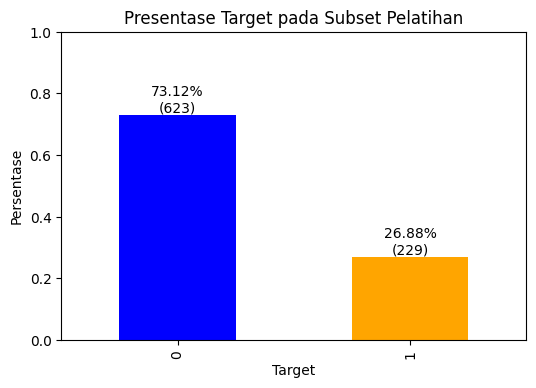

Jumlah data latih: 852
Jumlah data uji: 95


In [46]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Pisahkan fitur dan target dari dataframe yang sudah dinormalisasi
X = df_transform.drop('Diabetic', axis=1)
y = df_transform['Diabetic']

# Melakukan train-test split setelah normalisasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Menghitung persentase dan jumlah target pada subset pelatihan
train_target_value_counts = y_train.value_counts(normalize=True)
train_target_counts = y_train.value_counts()

# Membuat plot untuk presentase dan jumlah target pada subset pelatihan
plt.figure(figsize=(6, 4))
ax = train_target_value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Presentase Target pada Subset Pelatihan')
plt.xlabel('Target')
plt.ylabel('Persentase')

# Menambahkan label untuk setiap bar
for i, v in enumerate(train_target_value_counts):
    ax.text(i, v + 0.01, f'{v:.2%}\n({train_target_counts[i]})', ha='center', color='black')

plt.ylim(0, 1)  # Set batas y-axis antara 0 dan 1 untuk representasi persentase
plt.show()

# Tampilkan jumlah data latih dan data uji setelah di-split
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah sampel untuk setiap kelas target setelah oversampling (Data Pelatihan):
0    623
1    623
Name: Diabetic, dtype: int64


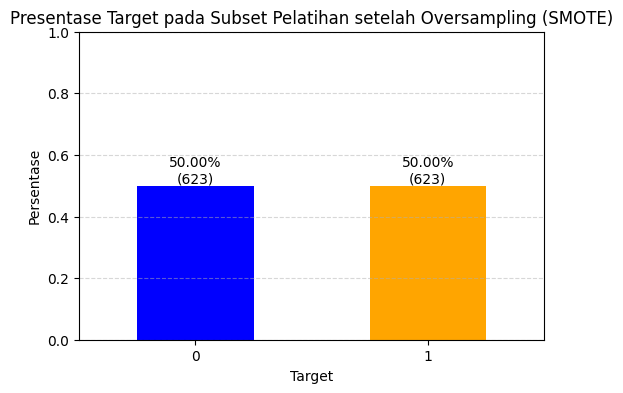

In [47]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data pelatihan
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Menampilkan jumlah sampel untuk setiap kelas target setelah oversampling pada data pelatihan
print("Jumlah sampel untuk setiap kelas target setelah oversampling (Data Pelatihan):")
print(y_train_resampled.value_counts())

# Menampilkan persentase dan jumlah target pada subset pelatihan setelah oversampling
train_resampled_target_value_counts = y_train_resampled.value_counts(normalize=True)
train_resampled_target_counts = y_train_resampled.value_counts()

# Membuat plot untuk presentase dan jumlah target pada subset pelatihan setelah oversampling
plt.figure(figsize=(6, 4))
ax = train_resampled_target_value_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Presentase Target pada Subset Pelatihan setelah Oversampling (SMOTE)')
plt.xlabel('Target')
plt.ylabel('Persentase')

# Menambahkan label untuk setiap bar
for i, v in enumerate(train_resampled_target_value_counts):
    ax.text(i, v + 0.01, f'{v:.2%}\n({train_resampled_target_counts[i]})', ha='center', color='black')

# Menetapkan posisi dan label sumbu x
plt.xticks(rotation=0, ticks=range(len(train_resampled_target_value_counts)), labels=train_resampled_target_value_counts.index)

plt.ylim(0, 1)  # Set batas y-axis antara 0 dan 1 untuk representasi persentase
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan normalisasi pada data pelatihan yang telah diresample
X_train_resampled_normalized = scaler.fit_transform(X_train_resampled)

# Lakukan normalisasi pada data uji
X_test_normalized = scaler.transform(X_test)

In [49]:
import pandas as pd

# Buat DataFrame untuk data pelatihan sebelum normalisasi
df_train_before_normalized = pd.DataFrame(X_train, columns=X_train.columns)

# Tampilkan DataFrame sebelum normalisasi
print("Data pelatihan sebelum normalisasi:")
print(df_train_before_normalized.head())  # Menampilkan beberapa baris pertama dari DataFrame

# Buat DataFrame untuk data pelatihan setelah normalisasi
df_train_after_normalized = pd.DataFrame(X_train_resampled_normalized, columns=X_train.columns)

# Tampilkan DataFrame setelah normalisasi
print("\nData pelatihan setelah normalisasi:")
print(df_train_after_normalized.head())  # Menampilkan beberapa baris pertama dari DataFrame

# Buat DataFrame untuk data pelatihan sebelum normalisasi
df_test_before_normalized = pd.DataFrame(X_test, columns=X_test.columns)

# Tampilkan DataFrame Pengujian sebelum normalisasi
print("Data pengujian sebelum normalisasi:")
print(df_test_before_normalized.head())  # Menampilkan beberapa baris pertama dari DataFrame

# Buat DataFrame untuk data Pengujian setelah normalisasi
df_test_after_normalized = pd.DataFrame(X_test_normalized, columns=X_test.columns)

# Tampilkan DataFrame Pengujian setelah normalisasi
print("\nData pengujian setelah normalisasi:")
print(df_test_after_normalized.head())  # Menampilkan beberapa baris pertama dari DataFrame

Data pelatihan sebelum normalisasi:
     Age  Gender  Family_Diabetes  highBP  PhysicallyActive   BMI  Smoking  \
610  3.0     1.0              1.0     0.0               3.0  20.0      0.0   
577  3.0     0.0              0.0     0.0               3.0  26.0      0.0   
599  1.0     0.0              0.0     1.0               0.0  31.0      0.0   
949  2.0     1.0              0.0     1.0               2.0  23.0      0.0   
307  3.0     1.0              1.0     1.0               3.0  26.0      1.0   

     Alcohol  Sleep  SoundSleep  RegularMedicine  JunkFood  Stress  BPLevel  \
610      0.0      7           6              0.0       1.0     1.0      2.0   
577      0.0      8           6              0.0       1.0     2.0      1.0   
599      0.0      7           4              1.0       1.0     3.0      0.0   
949      0.0      6           5              1.0       1.0     2.0      0.0   
307      1.0      5           4              1.0       2.0     1.0      0.0   

     Pregancies  Pdi

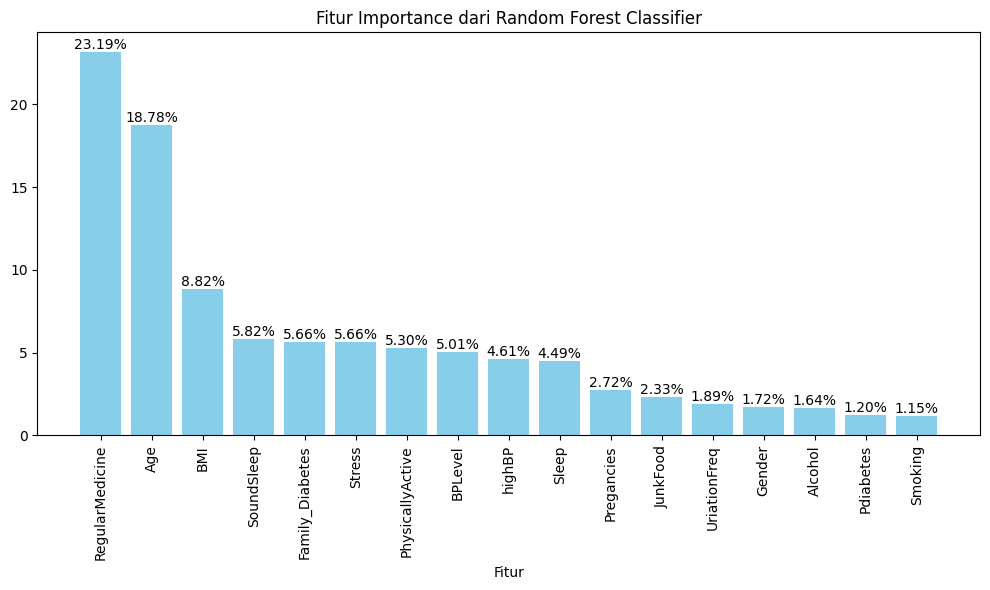

Fitur Terpilih:
['RegularMedicine', 'Age', 'BMI', 'SoundSleep', 'Family_Diabetes', 'Stress', 'PhysicallyActive', 'BPLevel', 'highBP', 'Sleep']


In [50]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Inisialisasi model Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Latih model pada data pelatihan yang telah diresample dan dinormalisasi
rf_classifier.fit(X_train_resampled_normalized, y_train_resampled)

# Mendapatkan nilai feature importance
feature_importances = rf_classifier.feature_importances_

# Membuat dataframe untuk menyimpan feature importance beserta namanya
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Mengonversi nilai penting ke dalam persentase
feature_importance_df['Importance (%)'] = (feature_importance_df['Importance'] * 100).round(2)

# Mengurutkan fitur berdasarkan feature importance dari yang tertinggi
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan fitur yang dipilih (misalnya, 10 fitur teratas)
selected_features = feature_importance_df.head(10)['Feature'].tolist()

# Normalisasi data berdasarkan fitur yang dipilih
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test[selected_features]

#Menampilkan grafik seleksi fitur
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Fitur')
#plt.ylabel('Importance (%)')
plt.title('Fitur Importance dari Random Forest Classifier')
plt.xticks(rotation=90)
plt.tight_layout()

# Menambahkan label presentase pada setiap batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='bottom')

plt.show()
print("Fitur Terpilih:")
print(selected_features)

In [51]:
#SPLIT-SMOTE-NORMALISASI-SF-MODEL
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Latih model pada data pelatihan yang telah di-resample dan dinormalisasi
rf_classifier.fit(X_train_selected, y_train_resampled)

# Prediksi label dengan data uji
y_pred = rf_classifier.predict(X_test_selected)

# Hitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Hasil Evaluasi Model:")
print("Akurasi:", accuracy)
print("Presisi:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Hasil Evaluasi Model:
Akurasi: 0.968421052631579
Presisi: 1.0
Recall: 0.9166666666666666
F1-score: 0.9565217391304348


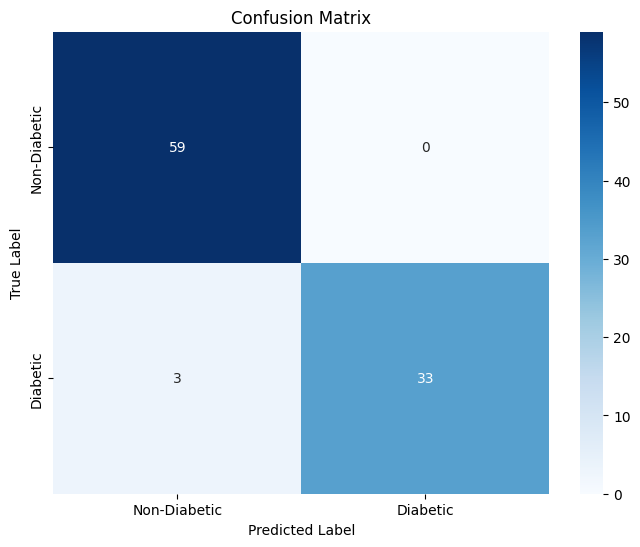

In [52]:
from sklearn.metrics import confusion_matrix

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix sebagai gambar menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Diabetic', 'Diabetic'],
            yticklabels=['Non-Diabetic', 'Diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
#DENGAN PARAMETER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools

# Tentukan rentang nilai parameter yang ingin Anda coba
n_estimators_values = [50, 100, 200]
max_depth_values = [10, 15, 20]

best_accuracy_1 = 0
best_params = {}

# Iterasi melalui semua kombinasi nilai parameter
for n_estimators, max_depth in itertools.product(n_estimators_values, max_depth_values):
    # Inisialisasi model dengan parameter yang dipilih
    RF_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Latih model pada data pelatihan yang dipilih
    RF_model.fit(X_train_selected, y_train_resampled)

    # Lakukan prediksi pada data uji
    y_pred = RF_model.predict(X_test_selected)

    # Hitung metrik evaluasi
    accuracy1 = accuracy_score(y_test, y_pred)
    precision1 = precision_score(y_test, y_pred)
    recall1 = recall_score(y_test, y_pred)
    f1_1 = f1_score(y_test, y_pred)

    # Simpan parameter dan hasil evaluasi jika kinerja terbaik
    if accuracy1 > best_accuracy_1:
        best_accuracy_1 = accuracy1
        best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# Tampilkan parameter terbaik dan hasil evaluasi
print("Parameter terbaik:", best_params)
print("Akurasi terbaik:", best_accuracy_1)
print("Presisi:", precision1)
print("Recall:", recall1)
print("F1-score:", f1_1)

Parameter terbaik: {'n_estimators': 50, 'max_depth': 10}
Akurasi terbaik: 0.968421052631579
Presisi: 1.0
Recall: 0.9166666666666666
F1-score: 0.9565217391304348


In [54]:
import pickle

In [56]:
filename = 'diabetes_dataset.sav'
pickle.dump(RF_model, open(filename, 'wb'))